In [51]:
import requests 
import pandas as pd
import sqlite3
import lxml.html

In [52]:
r = requests.get("https://pokemondb.net/pokedex/all")

In [53]:
html = lxml.html.fromstring(r.text)
pokedex = html.get_element_by_id("pokedex")
tablebody = pokedex.getchildren()[1]

In [54]:
tablebody.getchildren()[1].text_content()

'\n002 IvysaurGrass Poison\n405\n60\n62\n63\n80\n80\n60\n'

In [55]:
tablebody.getchildren()[1].getchildren()[1].text_content()

'Ivysaur'

In [56]:
len(tablebody.getchildren())

1045

In [58]:
data = {
    "Number": [],
    "Name": [],
    "Type":   [],
    "Total Stat":  [],
    "HP":      [],
    "Attack": [],
    "Defense": [],
    "Sp.Attack": [],
    "Sp.Defense": [],
    "Speed": []
}

for row in tablebody.getchildren():
    cells = row.getchildren()
    
    data["Number"].append(cells[0].text_content())
    data["Name"].append(cells[1].text_content())
    data["Type"].append(cells[2].text_content().upper().strip())
    data["Total Stat"].append(cells[3].text_content())
    data["HP"].append(cells[4].text_content())
    data["Attack"].append(cells[5].text_content())
    data["Defense"].append(cells[6].text_content())
    data["Sp.Attack"].append(cells[7].text_content())
    data["Sp.Defense"].append(cells[8].text_content())
    data["Speed"].append(cells[9].text_content())
   
    

df=pd.DataFrame(data)


In [59]:
df

,Number,Name,Type,Total Stat,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed
0,001,Bulbasaur,GRASS POISON,318,45,49,49,65,65,45
1,002,Ivysaur,GRASS POISON,405,60,62,63,80,80,60
2,003,Venusaur,GRASS POISON,525,80,82,83,100,100,80
3,003,Venusaur Mega Venusaur,GRASS POISON,625,80,100,123,122,120,80
4,004,Charmander,FIRE,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...,...,...,...
1040,896,Glastrier,ICE,580,100,145,130,65,110,30
1041,897,Spectrier,GHOST,580,100,65,60,145,80,130
1042,898,Calyrex,PSYCHIC GRASS,500,100,80,80,80,80,80
1043,898,Calyrex Ice Rider,PSYCHIC ICE,680,100,165,150,85,130,50


In [60]:
df[df.Type == "WATER"]

,Number,Name,Type,Total Stat,HP,Attack,Defense,Sp.Attack,Sp.Defense,Speed
9,007,Squirtle,WATER,314,44,48,65,50,64,43
10,008,Wartortle,WATER,405,59,63,80,65,80,58
11,009,Blastoise,WATER,530,79,83,100,85,105,78
12,009,Blastoise Mega Blastoise,WATER,630,79,103,120,135,115,78
72,054,Psyduck,WATER,320,50,52,48,65,50,55
...,...,...,...,...,...,...,...,...,...,...
953,817,Drizzile,WATER,420,65,60,55,95,55,90
954,818,Inteleon,WATER,530,70,85,65,125,65,120
969,833,Chewtle,WATER,284,50,64,50,38,38,44
982,846,Arrokuda,WATER,280,41,63,40,40,30,66


In [61]:
Counts=df['Type'].value_counts()
Counts

WATER              72
NORMAL             71
PSYCHIC            45
GRASS              43
ELECTRIC           34
                   ..
ELECTRIC WATER      1
BUG GHOST           1
GROUND ELECTRIC     1
ROCK POISON         1
FIRE DARK           1
Name: Type, Length: 192, dtype: int64

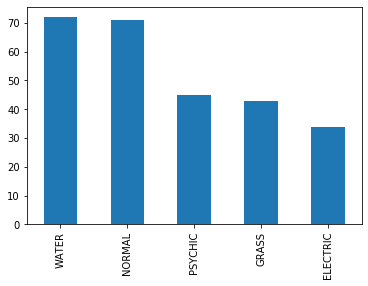

In [62]:
Counts.head().plot(kind='bar',)


In [63]:
db = sqlite3.connect(":memory:")
cursor = db.cursor()
cursor.execute("""
    CREATE TABLE POKEDEX(Number,Name,TYPE,Total_Stat,HP,Attack,Defense,Sp_Attack,Sp_Defense,Speed)
""")

for row in df[df.Type.isin(["ICE","GRASS"])].itertuples():
    insert_sql_syntax= ("""
    INSERT INTO POKEDEX(Number,Name,TYPE,Total_Stat,HP,Attack,Defense,Sp_Attack,Sp_Defense,Speed)
    VALUES (?,?,?,?,?,?,?,?,?,?)
""")
    cursor.execute(insert_sql_syntax,row[1:])
db.commit()
#db.close

In [64]:
for row in cursor.execute("""
    Select Name, HP
    From POKEDEX
    Where Type = "ICE"
"""):
    print(row)


('Vulpix Alolan Vulpix', '38')
('Castform Snowy Form', '70')
('Snorunt', '50')
('Glalie', '80')
('Glalie Mega Glalie', '80')
('Regice', '80')
('Glaceon', '65')
('Darumaka Galarian Darumaka', '70')
('Darmanitan Galarian Standard Mode', '105')
('Vanillite', '36')
('Vanillish', '51')
('Vanilluxe', '71')
('Cubchoo', '55')
('Beartic', '95')
('Cryogonal', '80')
('Bergmite', '55')
('Avalugg', '95')
('Eiscue Ice Face', '75')
('Eiscue Noice Face', '75')
('Glastrier', '100')
